<a href="https://colab.research.google.com/github/ji-min000/b06/blob/feature%2Fdigging/%EB%AA%85%EC%84%A0)%20%EC%A0%84%EC%9E%90%EC%83%81%EA%B1%B0%EB%9E%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 CSV 파일 불러오기 + 인코딩 수정
data = pd.read_csv("/content/drive/MyDrive/Ecommerce2020_Date.csv", encoding='windows-1252')
data.head(5)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [5]:
# 각 컬럼의 세그먼트 수 계산
segment_counts = {}
for column in data.columns:
    segment_counts[column] = data[column].nunique()

# 결과 출력
print("각 컬럼의 세그먼트 수:")
for column, count in segment_counts.items():
    print(f"{column}: {count}")

각 컬럼의 세그먼트 수:
formatted_order_date: 322
Row ID: 3312
Order ID: 1687
Ship Mode: 4
Customer ID: 693
Segment: 3
Country: 1
City: 350
State: 47
Postal Code: 437
Region: 4
Product ID: 1525
Category: 3
Sub-Category: 17
Product Name: 1511
Sales: 2552
Quantity: 14
Discount: 12
Profit: 2881


In [6]:
# 데이터프레임에서 각 컬럼의 세그먼트 종류와 세그먼트 수 조회
segment_info = {}
for column in data.columns:
    segment_info[column] = {
        'segment_count': data[column].nunique(),
        'segments': data[column].unique().tolist()
    }

# 결과 출력
for column, info in segment_info.items():
    print(f"Column Name: {column}")
    print(f"Segment Count: {info['segment_count']}")
    print(f"Segments: {info['segments']}")
    print()

Column Name: formatted_order_date
Segment Count: 322
Segments: ['2020.1.1', '2020.1.2', '2020.1.3', '2020.1.6', '2020.1.7', '2020.1.8', '2020.1.9', '2020.1.12', '2020.1.13', '2020.1.14', '2020.1.15', '2020.1.16', '2020.1.19', '2020.1.20', '2020.1.21', '2020.1.22', '2020.1.23', '2020.1.24', '2020.1.26', '2020.1.27', '2020.1.28', '2020.1.29', '2020.1.30', '2020.2.2', '2020.2.3', '2020.2.4', '2020.2.5', '2020.2.6', '2020.2.9', '2020.2.10', '2020.2.11', '2020.2.13', '2020.2.16', '2020.2.17', '2020.2.18', '2020.2.19', '2020.2.20', '2020.2.21', '2020.2.23', '2020.2.24', '2020.2.25', '2020.2.26', '2020.2.28', '2020.3.2', '2020.3.3', '2020.3.4', '2020.3.5', '2020.3.6', '2020.3.7', '2020.3.8', '2020.3.9', '2020.3.10', '2020.3.11', '2020.3.12', '2020.3.13', '2020.3.14', '2020.3.16', '2020.3.17', '2020.3.18', '2020.3.19', '2020.3.20', '2020.3.21', '2020.3.23', '2020.3.24', '2020.3.25', '2020.3.26', '2020.3.27', '2020.3.28', '2020.3.29', '2020.3.30', '2020.3.31', '2020.4.1', '2020.4.2', '2020.4.3'

1. 주문자의 형태에 따라 어떤 배송형태로 주문했을까?

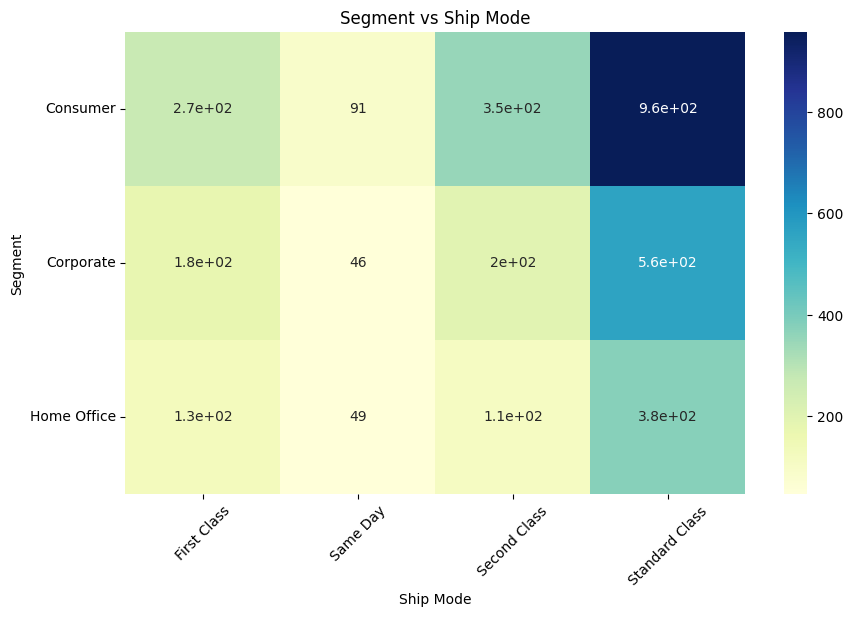

In [7]:
# 데이터프레임에서 교차 테이블 생성
cross_table = pd.crosstab(data['Segment'], data['Ship Mode'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap="YlGnBu")
plt.title('Segment vs Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Segment')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

2. 주별 주문자 형태 (3종류)

In [8]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 주문자 형태별 주문건수 테이블 생성
order_count_by_segment = df.groupby('Segment').size().reset_index(name='주문건수')

print(order_count_by_segment)

       Segment  주문건수
0     Consumer  1668
1    Corporate   980
2  Home Office   664


In [9]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 주문자 형태별 주문건수 상위 5개 주(State) 조회
top_states_by_segment = df.groupby('Segment')['State'].value_counts().groupby(level=0).nlargest(5)
print(top_states_by_segment)

Segment      Segment      State       
Consumer     Consumer     California      328
                          New York        185
                          Texas           174
                          Washington      105
                          Pennsylvania    102
Corporate    Corporate    California      218
                          New York        104
                          Texas            89
                          Pennsylvania     71
                          Washington       56
Home Office  Home Office  California      117
                          New York         63
                          Texas            54
                          Washington       54
                          Illinois         40
Name: State, dtype: int64


In [10]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 주문자 형태별 주문건수 상위 5개 도시(City) 조회
top_cities_by_segment = df.groupby('Segment')['City'].value_counts().groupby(level=0).nlargest(5)
print(top_cities_by_segment)

Segment      Segment      City         
Consumer     Consumer     New York City    167
                          Los Angeles      114
                          Philadelphia      99
                          San Francisco     93
                          Seattle           78
Corporate    Corporate    New York City     83
                          Los Angeles       63
                          Philadelphia      63
                          San Francisco     54
                          Seattle           51
Home Office  Home Office  New York City     56
                          Seattle           53
                          San Francisco     43
                          Chicago           36
                          Los Angeles       33
Name: City, dtype: int64


In [11]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 주문자 형태별 주문금액 상위 5개 주(State) 조회
top_states_by_segment = df.groupby('Segment').apply(lambda x: x.groupby('State')['Sales'].sum().nlargest(5)).reset_index()
print(top_states_by_segment)

        Segment           State       Sales
0      Consumer      California  57682.4555
1      Consumer        New York  36906.0040
2      Consumer      Washington  34453.6200
3      Consumer    Pennsylvania  24649.6780
4      Consumer           Texas  23550.3814
5     Corporate      California  58999.5720
6     Corporate        New York  28415.5280
7     Corporate      Washington  17445.8600
8     Corporate           Texas  13705.7394
9     Corporate  North Carolina  12557.0060
10  Home Office      California  29706.3170
11  Home Office        New York  28601.4630
12  Home Office      Washington  13640.4160
13  Home Office        Illinois   7413.3090
14  Home Office        Michigan   6618.1030


In [12]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 주문자 형태별 주문금액 상위 5개 도시(City) 조회
top_cities_by_segment = df.groupby('Segment').apply(lambda x: x.groupby('City')['Sales'].sum().nlargest(5)).reset_index()
print(top_cities_by_segment)

        Segment           City       Sales
0      Consumer  New York City  35229.7700
1      Consumer        Seattle  27873.0980
2      Consumer   Philadelphia  24414.0830
3      Consumer    Los Angeles  20182.8195
4      Consumer  San Francisco  18041.3460
5     Corporate  New York City  23958.7500
6     Corporate        Seattle  15613.5660
7     Corporate  San Francisco  15029.7830
8     Corporate    Los Angeles  13144.0740
9     Corporate   Philadelphia  11247.8220
10  Home Office  New York City  27751.0810
11  Home Office    Los Angeles  15548.7990
12  Home Office        Seattle  13504.1560
13  Home Office        Chicago   6813.9570
14  Home Office   Philadelphia   5933.5970


3. 주별 어떤 배송형태를 선호했는지
- 주문건수
- 주문금액

In [13]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 배송 형태별 주문건수 상위 5개 주(State) 조회
top_5_states_by_ship_mode = df.groupby('Ship Mode')['State'].value_counts().groupby(level=0).head(5)
print(top_5_states_by_ship_mode)

Ship Mode       State       
First Class     California      107
                Texas            63
                New York         45
                Pennsylvania     45
                Washington       42
Same Day        California       42
                Washington       18
                Illinois         17
                Ohio             15
                Texas            14
Second Class    California      145
                New York         88
                Texas            57
                Washington       41
                Ohio             32
Standard Class  California      369
                New York        207
                Texas           183
                Pennsylvania    124
                Washington      114
Name: State, dtype: int64


In [14]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 배송 형태별 주문건수 상위 5개 도시(City) 조회
top_cities_by_ship_mode = df.groupby('Ship Mode')['City'].value_counts().groupby(level=0).nlargest(5)
print(top_cities_by_ship_mode)

Ship Mode       Ship Mode       City         
First Class     First Class     Philadelphia      43
                                New York City     42
                                Seattle           39
                                Los Angeles       37
                                San Francisco     23
Same Day        Same Day        San Francisco     20
                                Seattle           18
                                Los Angeles       14
                                New York City     11
                                Chicago           10
Second Class    Second Class    New York City     80
                                Los Angeles       43
                                Seattle           31
                                San Francisco     30
                                Houston           23
Standard Class  Standard Class  New York City    173
                                San Francisco    117
                                Los Angeles      116


In [15]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 배송 형태별 주문금액 상위 5개 주(State) 조회
top_5_states_by_ship_mode = df.groupby('Ship Mode')['State'].value_counts().groupby(level=0).head(5)
print(top_5_states_by_ship_mode)

Ship Mode       State       
First Class     California      107
                Texas            63
                New York         45
                Pennsylvania     45
                Washington       42
Same Day        California       42
                Washington       18
                Illinois         17
                Ohio             15
                Texas            14
Second Class    California      145
                New York         88
                Texas            57
                Washington       41
                Ohio             32
Standard Class  California      369
                New York        207
                Texas           183
                Pennsylvania    124
                Washington      114
Name: State, dtype: int64


In [16]:
# 배송 형태별 총 주문금액 계산
ship_mode_sales = df.groupby(['Ship Mode', 'State'])['Sales'].sum().reset_index()

# 배송 형태별 총 주문금액 상위 5 주(State) 조회
top_5_states_by_ship_mode = ship_mode_sales.groupby('Ship Mode').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)
print(top_5_states_by_ship_mode)

         Ship Mode           State       Sales
0      First Class      California  27049.8500
1      First Class        New York  25155.6020
2      First Class      Washington  20560.3120
3      First Class           Texas   9556.2196
4      First Class    Pennsylvania   7479.5670
5         Same Day      California  11758.2820
6         Same Day  North Carolina   9018.5610
7         Same Day      Washington   7130.5780
8         Same Day        Illinois   2770.8740
9         Same Day        Oklahoma   2322.2600
10    Second Class      California  28214.5630
11    Second Class        New York  13808.6450
12    Second Class    Pennsylvania  13299.0500
13    Second Class      Washington  11004.7960
14    Second Class        Kentucky   9763.4100
15  Standard Class      California  79365.6495
16  Standard Class        New York  52652.9360
17  Standard Class      Washington  26844.2100
18  Standard Class           Texas  24561.6822
19  Standard Class    Pennsylvania  20543.7030


In [17]:
# 배송 형태별 총 주문금액 계산
ship_mode_sales = df.groupby(['Ship Mode', 'City'])['Sales'].sum().reset_index()

# 배송 형태별 총 주문금액 상위 5개 도시(City) 조회
top_5_cities_by_ship_mode = ship_mode_sales.groupby('Ship Mode').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)
print(top_5_cities_by_ship_mode)

         Ship Mode              City       Sales
0      First Class     New York City  23789.1380
1      First Class           Seattle  19997.6600
2      First Class     San Francisco   9562.9610
3      First Class       Los Angeles   8925.8910
4      First Class      Philadelphia   7280.0760
5         Same Day        Burlington   8167.4200
6         Same Day           Seattle   7130.5780
7         Same Day     San Francisco   3971.4320
8         Same Day  Huntington Beach   2399.9600
9         Same Day     New York City   2185.8720
10    Second Class     New York City  13202.6430
11    Second Class      Philadelphia  13069.1700
12    Second Class       Los Angeles   9889.6700
13    Second Class           Jackson   7386.0820
14    Second Class           Seattle   7239.7020
15  Standard Class     New York City  47761.9480
16  Standard Class       Los Angeles  28355.1035
17  Standard Class           Seattle  22622.8800
18  Standard Class      Philadelphia  19880.2700
19  Standard Class  

4. 주별 카테고리별 주문 횟수

In [18]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 카테고리 별 주문건수 상위 5개 주(state) 조회
top_states_by_category = df.groupby('Category')['State'].value_counts().groupby(level=0).nlargest(5)
print(top_states_by_category)

Category         Category         State       
Furniture        Furniture        California      140
                                  New York         77
                                  Texas            56
                                  Pennsylvania     49
                                  Washington       48
Office Supplies  Office Supplies  California      403
                                  Texas           214
                                  New York        200
                                  Washington      123
                                  Pennsylvania    108
Technology       Technology       California      120
                                  New York         75
                                  Texas            47
                                  Washington       44
                                  Pennsylvania     40
Name: State, dtype: int64


In [19]:
# 카테고리 별 총 주문금액 계산
category_sales = df.groupby(['Category', 'State'])['Sales'].sum().reset_index()

# 카테고리 별 총 주문금액 상위 5개 주(State) 조회
top_states_by_category_sales = category_sales.groupby('Category').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)
print(top_states_by_category_sales)

           Category         State       Sales
0         Furniture    California  40674.3705
1         Furniture      New York  23624.1790
2         Furniture    Washington  18536.3420
3         Furniture         Texas  16010.8342
4         Furniture  Pennsylvania  15325.4510
5   Office Supplies    California  55412.8340
6   Office Supplies      New York  26676.9480
7   Office Supplies    Washington  17044.7420
8   Office Supplies  Pennsylvania  13775.5520
9   Office Supplies         Texas  13273.1320
10       Technology    California  50301.1400
11       Technology      New York  43621.8680
12       Technology    Washington  29958.8120
13       Technology         Texas  14137.7920
14       Technology  Pennsylvania  13587.3030
